In [1]:
#Mounting google and authenticating
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
#!ls /mydrive

Mounted at /content/gdrive


In [2]:
!cp /mydrive/music\ project/X_spec_half.pickle ./
!cp /mydrive/music\ project/y_spec_half.pickle ./

In [3]:
import pickle 
pickle_off = open("X_spec_half.pickle", 'rb')
X_spec = pickle.load(pickle_off)

pickle_off = open("y_spec_half.pickle", 'rb')
y_spec = pickle.load(pickle_off)

In [11]:
X_spec_ = X_spec.reshape(48, 440, 128)
y_spec_ = y_spec.reshape(48, 440, 128)

In [17]:
X_spec_.shape

(2703360, 1)

In [16]:
X_spec_ = X_spec_.reshape(-1,1)
y_spec_ = y_spec_.reshape(-1,1)

In [ ]:
X_spec_ = X_spec_.reshape(1, 2703360,1)
y_spec_ = y_spec_.reshape(1, 2703360,1)

In [18]:
a = X_spec_.reshape(48, 440, 128)
b = y_spec_.reshape(48, 440, 128)

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
#from tensorflow.keras.layers import Lambda, RepeatVector, Reshape
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, GlobalMaxPool2D
from tensorflow.keras.layers import Concatenate 
from tensorflow.keras.optimizers import Adam

In [ ]:
#Using Random Forest
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_spec_, y_spec_)

#print(regr.predict([[0, 0, 0, 0]]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
#R square
regr.score(X_spec_, y_spec_)

0.3967978758216605

In [ ]:
#Using regressor sequential
from tensorflow import keras
from tensorflow.keras import layers

horsepower_normalizer = preprocessing.Normalization(input_shape=[1,])
horsepower_normalizer.adapt(X_spec_
                            )

horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

In [ ]:
import tensorflow as tf
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error', metrics=[tf.keras.metrics.MeanSquaredError()])

history = horsepower_model.fit(
    X_spec_, y_spec_,
    epochs=5,
    # suppress logging
    #verbose=0,
    # Calculate validation results on 10% of the training data
    validation_split = 0.1)

Epoch 1/5
76032/76032 [==============================] - 117s 2ms/step - loss: 10.2469 - mean_squared_error: 186.6453 - val_loss: 8.7888 - val_mean_squared_error: 126.8809
Epoch 2/5
76032/76032 [==============================] - 116s 2ms/step - loss: 9.7955 - mean_squared_error: 165.4883 - val_loss: 8.7916 - val_mean_squared_error: 126.2527
Epoch 3/5
76032/76032 [==============================] - 117s 2ms/step - loss: 9.7876 - mean_squared_error: 165.1230 - val_loss: 8.8311 - val_mean_squared_error: 127.3049
Epoch 4/5
76032/76032 [==============================] - 117s 2ms/step - loss: 9.8009 - mean_squared_error: 165.6078 - val_loss: 8.7863 - val_mean_squared_error: 126.4755
Epoch 5/5
76032/76032 [==============================] - 117s 2ms/step - loss: 9.7931 - mean_squared_error: 165.4911 - val_loss: 8.7642 - val_mean_squared_error: 125.6438


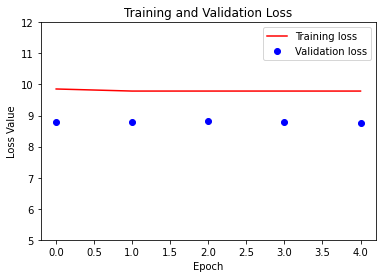

In [ ]:
import matplotlib.pyplot as plt

Epochs = 5
train_loss = history.history['loss']
train_accuracy = history.history['val_loss']

epochs = range(Epochs)

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, train_accuracy, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([5, 12])
plt.legend()
plt.show()

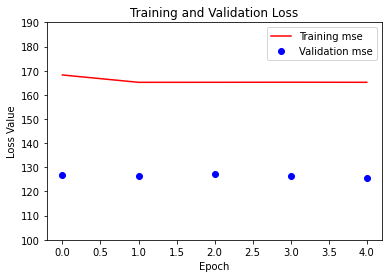

In [ ]:
import matplotlib.pyplot as plt

Epochs = 5
train_loss = history.history['mean_squared_error']
train_accuracy = history.history['val_mean_squared_error']

epochs = range(Epochs)

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training mse')
plt.plot(epochs, train_accuracy, 'bo', label='Validation mse')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([100, 190])
plt.legend()
plt.show()

In [15]:
# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
import tensorflow as tf

# define input sequence
#sequence = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
#n_in = len(sequence)
#sequence = sequence.reshape((1, n_in, 1))
# define model

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(440,128)))
model.add(RepeatVector(440))
#model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(RepeatVector(128))
#model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.MeanSquaredError()])
# fit model


ValueError: ignored

In [12]:
history = model.fit(X_spec_, y_spec_, epochs=20, verbose=0)


ValueError: ignored

In [ ]:
plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')
# demonstrate recreation
yhat = model.predict(X_spec_[1], verbose=0)
print(yhat[0,:,0])